# Contexto

Opendata AIG Brazil

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA nos últimos 10 anos e que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo Painel SIPAER disponível na página do CENIPA.

Dados proveniente dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Emissão de Raio Laser e Risco Baloeiro) não constam nesta base. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 têm foco principal na investigação de acidentes (AIG).
Tabelas (arquivos)

    OCORRÊNCIA.csv - Informações sobre as ocorrências.
    OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
    AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
    FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
    RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.
    Fonte: Sistema DÉDALO.

- Fonte 	http://www.fab.mil.br/cenipa/
- Autor 	Centro de Investigação e Prevenção de Acidentes Aeronáuticos
- Última Atualização 	5 de Outubro de 2021, 19:19 (UTC-03:00)
- Cobertura geográfica 	Brasil
- Cobertura temporal 	2010 a 2019
- Frequência de atualização 	Anual
- Granularidade geográfica 	Aeródromo
- Granularidade temporal 	Hora:Minuto

Number of Rows: 14345
Number of Cols: 46

**40 Colunas Categoricas:**

- ocorrencia_classificacao                 category
- ocorrencia_latitude                      category
- ocorrencia_longitude                     category
- ocorrencia_cidade                        category
- ocorrencia_uf                            category
- ocorrencia_pais                          category
- ocorrencia_aerodromo                     category
- ocorrencia_hora                          category
- investigacao_aeronave_liberada           category
- investigacao_status                      category
- divulgacao_relatorio_publicado           category
- divulgacao_dia_publicacao                category
- ocorrencia_saida_pista                   category
- ocorrencia_tipo                          category
- ocorrencia_tipo_categoria                category
- taxonomia_tipo_icao                      category
- aeronave_matricula                       category
- aeronave_operador_categoria              category
- aeronave_tipo_veiculo                    category
- aeronave_fabricante                      category
- aeronave_modelo                          category
- aeronave_tipo_icao                       category
- aeronave_motor_tipo                      category
- aeronave_motor_quantidade                category
- aeronave_pais_fabricante                 category
- aeronave_pais_registro                   category
- aeronave_registro_categoria              category
- aeronave_registro_segmento               category
- aeronave_voo_origem                      category
- aeronave_voo_destino                     category
- aeronave_fase_operacao                   category
- aeronave_tipo_operacao                   category
- aeronave_nivel_dano                      category
- fator_nome                               category
- fator_aspecto                            category
- fator_condicionante                      category
- fator_area                               category
- recomendacao_conteudo                    category
- recomendacao_status                      category
- recomendacao_destinatario                category

**07 Colunas numéricas:**

- total_recomendacoes                         int32
- total_aeronaves_envolvidas                  int32
- aeronave_pmd                                int32
- aeronave_pmd_categoria                      int32
- aeronave_assentos                           int32
- aeronave_ano_fabricacao                   : Faz quantos anos que foi fabricado
- aeronave_fatalidades_total                  int32



**04 Colunas de data/hora:**
- ocorrencia_dia                     datetime64[ns]
- ocorrencia_hora                          category
- recomendacao_dia_assinatura                object
- recomendacao_dia_encaminhamento            object

## Tabela Relacionamento

<img src="http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/modelo_dados.png" width="700 px">

# 0.0. IMPORTS

In [1]:
import pandas as pd
import numpy as np
import math
import re

import missingno as msno

from matplotlib            import pyplot as plt
import plotly.express as px
from pandas_profiling import ProfileReport

from IPython.display import display
pd.options.display.max_columns = None

from IPython.core.display  import HTML


import seaborn as sns

In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

## 0.1. Helper Functions

In [2]:
def bar_plot_quantity_value_counts(data, y_, title):
    
    fig = plt.subplots(figsize = (15,4))
    sns.barplot(x= data.index , y = data[y_ ]);
    plt.title(title);
    
    return None
    

## 0.2. Loading data

In [7]:
ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


#merge
aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )



In [8]:
df_raw.sample(1)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
6898,65827,65827,65827,65827,65827,INCIDENTE,-3.0388888889,-60.0461111111,MANAUS,AM,BRASIL,SBEG,14/10/2016,13:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,PRTTH,REGULAR,AVIÃO,AEROSPATIALE AND ALENIA,ATR-42-500,AT45,TURBOÉLICE,BIMOTOR,18600,18600,52.0,1996.0,BRASIL,BRASIL,AVIÃO,REGULAR,EDUARDO GOMES,EDUARDO GOMES,SUBIDA,REGULAR,NENHUM,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [670]:
df_raw.info(null_counts=True)

<ipython-input-670-7128da69681d>:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
Int64Index: 12167 entries, 0 to 12166
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   codigo_ocorrencia                12167 non-null  int64  
 1   codigo_ocorrencia1               12167 non-null  int64  
 2   codigo_ocorrencia2               12167 non-null  int64  
 3   codigo_ocorrencia3               12167 non-null  int64  
 4   codigo_ocorrencia4               12167 non-null  int64  
 5   ocorrencia_classificacao         12167 non-null  object 
 6   ocorrencia_latitude              11184 non-null  object 
 7   ocorrencia_longitude             11184 non-null  object 
 8   ocorrencia_cidade                12167 non-null  object 
 9   ocorrencia_uf                    12167 non-null  object 
 10  ocorrencia_pais                  12167 non-null  object 
 11  ocorrencia_aerodromo             12167 non-null  object 
 12  ocorrencia_dia    

In [9]:
#df_raw.to_csv('./data/ocorrencias_aeronauticas_raw.csv', index=False)

In [29]:
df_raw = pd.read_csv('./data/ocorrencias_aeronauticas_raw.csv')

In [28]:
with pd.option_context('display.max_rows', 10):
    print(df_raw)

       codigo_ocorrencia  codigo_ocorrencia1  codigo_ocorrencia2  \
0                  40211               40211               40211   
1                  40349               40349               40349   
2                  40351               40351               40351   
3                  39527               39527               39527   
4                  39527               39527               39527   
...                  ...                 ...                 ...   
17641              80245               80245               80245   
17642              80247               80247               80247   
17643              80251               80251               80251   
17644              80257               80257               80257   
17645              80259               80259               80259   

       codigo_ocorrencia3  codigo_ocorrencia4 ocorrencia_classificacao  \
0                   40211               40211                INCIDENTE   
1                   40349          

# 1.0.  DESCRICAO DOS DADOS

In [30]:
df1 = df_raw.copy()

## 1.1. Rename Columns

## 1.2. Data Summarization

### 1.2.1 Data Dimensions

In [31]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 59


In [32]:
# mean % of  nulls
df1.isna().mean()*100

codigo_ocorrencia                   0.000000
codigo_ocorrencia1                  0.000000
codigo_ocorrencia2                  0.000000
codigo_ocorrencia3                  0.000000
codigo_ocorrencia4                  0.000000
ocorrencia_classificacao            0.000000
ocorrencia_latitude                 8.959538
ocorrencia_longitude                8.959538
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.000000
ocorrencia_pais                     0.000000
ocorrencia_aerodromo                0.000000
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     11.061997
investigacao_status                 2.006120
divulgacao_relatorio_numero         4.714950
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia

In [33]:
# description of numerical data , round(2)
df1.describe().round(2).T


,count,mean,std,min,25%,50%,75%,max
codigo_ocorrencia,17646.0,55161.20,14019.91,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia1,17646.0,55161.20,14019.91,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia2,17646.0,55161.20,14019.91,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia3,17646.0,55161.20,14019.91,39115.0,44606.75,49640.5,66430.75,80259.0
codigo_ocorrencia4,17646.0,55161.20,14019.91,39115.0,44606.75,49640.5,66430.75,80259.0
total_recomendacoes,17646.0,4.13,5.56,0.0,0.00,2.0,6.00,23.0
total_aeronaves_envolvidas,17646.0,1.04,0.19,1.0,1.00,1.0,1.00,3.0
aeronave_pmd,17646.0,12960.21,35548.75,0.0,1315.00,2155.0,6033.00,396895.0
aeronave_pmd_categoria,17646.0,12960.21,35548.75,0.0,1315.00,2155.0,6033.00,396895.0
aeronave_assentos,17418.0,21.80,49.70,0.0,2.00,6.0,9.00,384.0


In [34]:
# description for categorical data
df1.describe(include= object).T

,count,unique,top,freq
ocorrencia_classificacao,17646,3,ACIDENTE,11068
ocorrencia_latitude,16065,2732,***,1049
ocorrencia_longitude,16065,2728,***,1051
ocorrencia_cidade,17646,1133,RIO DE JANEIRO,1433
ocorrencia_uf,17646,28,SP,3575
ocorrencia_pais,17646,1,BRASIL,17646
ocorrencia_aerodromo,17646,531,****,7805
ocorrencia_dia,17646,3155,12/08/2010,723
ocorrencia_hora,17645,982,12:26:00,724
investigacao_aeronave_liberada,15694,3,SIM,12444


### 1.1.2 Pre data cleaning

In [35]:
# Replace *** values for na
df1.replace('***', np.nan, inplace= True)
df1.replace('****', np.nan, inplace= True)
df1.replace('*****', np.nan, inplace= True)
df1.replace('*******', np.nan, inplace= True)
df1.replace('*********', np.nan, inplace= True)


In [36]:
# ocorrencia_latitude e longitude
df1.ocorrencia_latitude.replace(0, np.nan, inplace= True)
df1.ocorrencia_longitude.replace(0, np.nan, inplace= True)
df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[***]',"",str(x)) )
df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[***]',"",str(x)) )
df1.ocorrencia_latitude = df1.ocorrencia_latitude.apply( lambda x: re.sub('[°]',"",str(x)) )
df1.ocorrencia_longitude = df1.ocorrencia_longitude.apply( lambda x: re.sub('[°]',"",str(x)) )

In [37]:
# aeronave_ano_fabricacao
df1['aeronave_ano_fabricacao']= df1.loc[df1['aeronave_ano_fabricacao'].notnull()]['aeronave_ano_fabricacao'].astype('int32')

df1['aeronave_ano_fabricacao'].replace(0.0, np.nan, inplace = True)
df1['aeronave_ano_fabricacao'].replace(9999.0, np.nan, inplace = True)

In [38]:
# drop duplicated and identity codes columns 
df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4', 'ocorrencia_pais'], axis=1, inplace=True)

In [39]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 17646
Number of Cols: 53


In [40]:
# description for categorical data
df1.describe(include= object).T

,count,unique,top,freq
ocorrencia_classificacao,17646,3,ACIDENTE,11068
ocorrencia_latitude,17646,2720,nan,2636
ocorrencia_longitude,17646,2717,nan,2639
ocorrencia_cidade,17646,1133,RIO DE JANEIRO,1433
ocorrencia_uf,17642,27,SP,3575
ocorrencia_aerodromo,9663,529,SBRJ,778
ocorrencia_dia,17646,3155,12/08/2010,723
ocorrencia_hora,17645,982,12:26:00,724
investigacao_aeronave_liberada,12475,2,SIM,12444
investigacao_status,17292,2,FINALIZADA,16765


In [178]:
# mean % of  nulls
df1.isna().mean()*100

ocorrencia_classificacao            0.000000
ocorrencia_latitude                14.938230
ocorrencia_longitude               14.955231
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.022668
ocorrencia_aerodromo               45.239714
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     29.304092
investigacao_status                 2.006120
divulgacao_relatorio_numero        22.928709
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia_tipo                     0.000000
ocorrencia_tipo_categoria           0.000000
taxonomia_tipo_icao                 0.000000
aeronave_matricula                  0.079338
aeronave_operador_categoria        82.817636
aeronave_tipo_veiculo               0.974725
aeronave_f

In [42]:
#df1.to_csv('./data/df1.csv', index=False)
df1 = pd.read_csv('./data/df1.csv')

## 1.2 Understanding the data  EDA

In [367]:
## PROFILE  

#profile = ProfileReport( df1 )
#profile.to_file( 'profile_v2.html' )

Summarize dataset:   0%|          | 0/66 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [467]:
#for coluna in df1.columns:
#    print(coluna.upper())
#    grafico = px.histogram(df1, x=coluna, color="ocorrencia_classificacao");
#    grafico.show()

#### Nr of seats

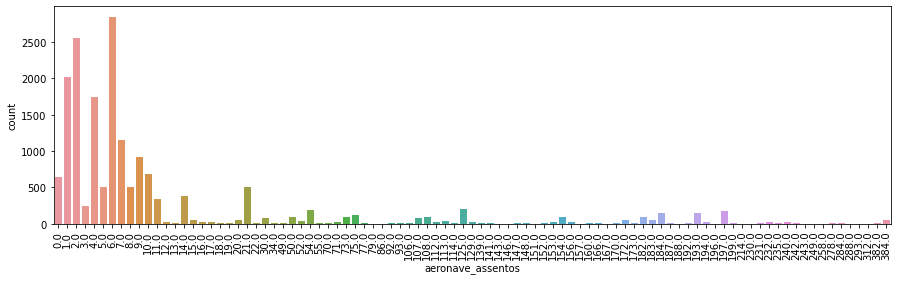

In [101]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_assentos', data = df1);
plt.xticks(rotation=90);


C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


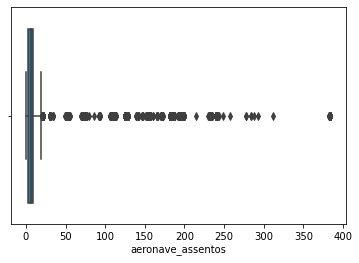

In [225]:
sns.boxplot(df1.aeronave_assentos);


#### Ano de Fabricação X Fabricante

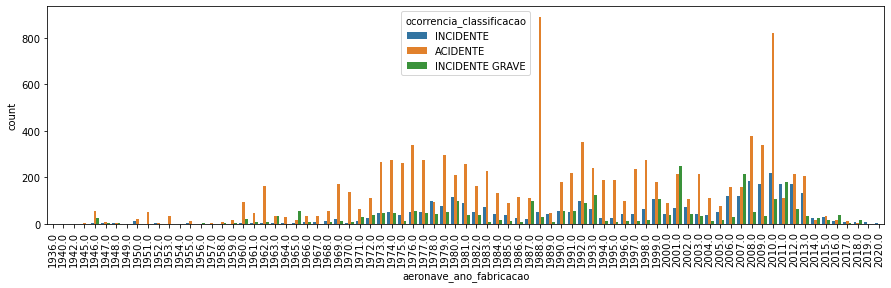

In [167]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_ano_fabricacao', hue='ocorrencia_classificacao' ,data = df1);
plt.xticks(rotation=90);

<ipython-input-285-e3302c225e95>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fabricante_1988 = df1[df1.ocorrencia_classificacao == ('ACIDENTE' )][df1.aeronave_ano_fabricacao == 1988]['aeronave_fabricante'].value_counts().to_frame()


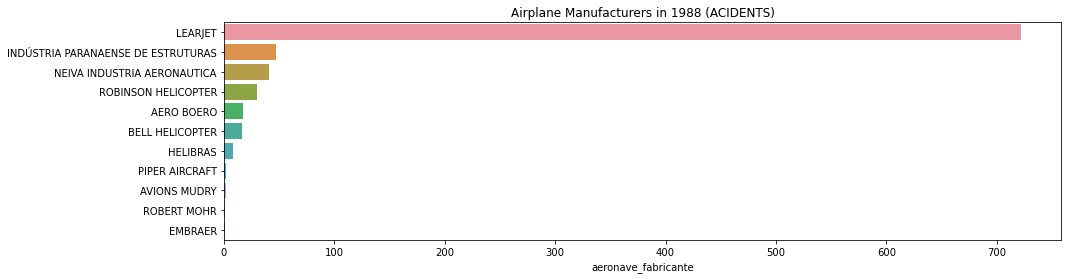

In [285]:
# in 1988 who has the manufacturer
fabricante_1988 = df1[df1.ocorrencia_classificacao == ('ACIDENTE' )][df1.aeronave_ano_fabricacao == 1988]['aeronave_fabricante'].value_counts().to_frame()
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_1988.aeronave_fabricante, y = fabricante_1988.index );
plt.title("Airplane Manufacturers in 1988 (ACIDENTS)");

<ipython-input-287-0eb4676c1651>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fabricante_2001 = df1[df1.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df1.aeronave_ano_fabricacao == 2001]['aeronave_fabricante'].value_counts().to_frame()


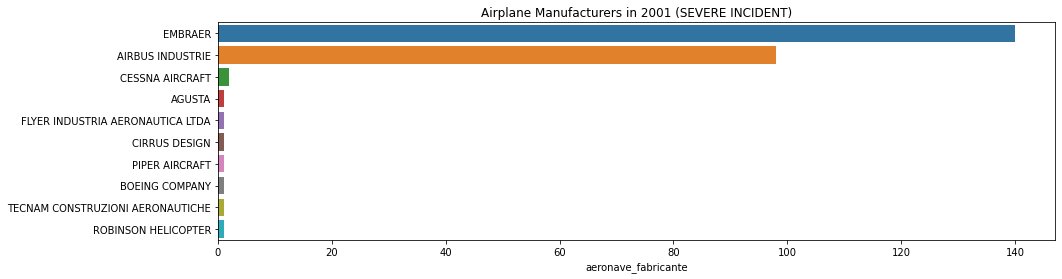

In [287]:
# in 2001 - serious incident
fabricante_2001 = df1[df1.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df1.aeronave_ano_fabricacao == 2001]['aeronave_fabricante'].value_counts().to_frame()

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2001.aeronave_fabricante, y = fabricante_2001.index );
plt.title("Airplane Manufacturers in 2001 (SEVERE INCIDENT)");


<ipython-input-294-1defbf9f8250>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fabricante_2007 = df1[df1.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df1.aeronave_ano_fabricacao == 2007]['aeronave_fabricante'].value_counts().to_frame()


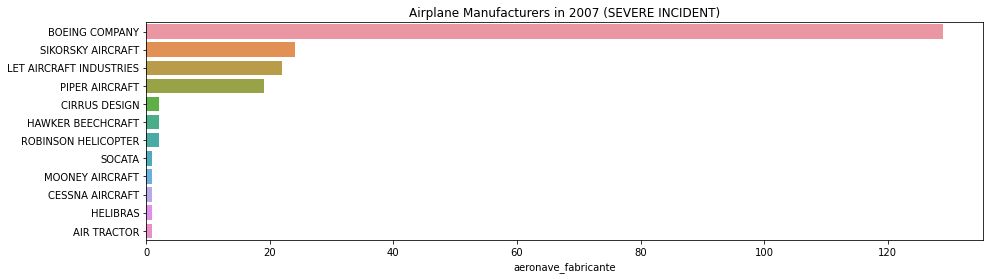

In [294]:
# in 2007 - serious incident
fabricante_2007 = df1[df1.ocorrencia_classificacao == ( 'INCIDENTE GRAVE')][df1.aeronave_ano_fabricacao == 2007]['aeronave_fabricante'].value_counts().to_frame()

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2007.aeronave_fabricante, y = fabricante_2007.index );
plt.title("Airplane Manufacturers in 2007 (SEVERE INCIDENT)");

<ipython-input-293-a66e0eec9dca>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fabricante_2010 = df1[df1.ocorrencia_classificacao == ( 'ACIDENTE')][df1.aeronave_ano_fabricacao == 2010]['aeronave_fabricante'].value_counts().to_frame()


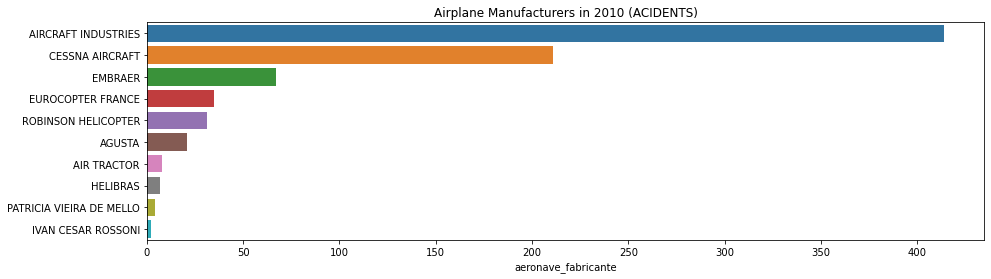

In [293]:
# in 2010 - acident
fabricante_2010 = df1[df1.ocorrencia_classificacao == ( 'ACIDENTE')][df1.aeronave_ano_fabricacao == 2010]['aeronave_fabricante'].value_counts().to_frame()
fabricante_2010 = fabricante_2010.sort_values('aeronave_fabricante', ascending = False).iloc[:10]
fig = plt.subplots(figsize = (15,4))

sns.barplot(x= fabricante_2010.aeronave_fabricante, y = fabricante_2010.index );
plt.title("Airplane Manufacturers in 2010 (ACIDENTS)");

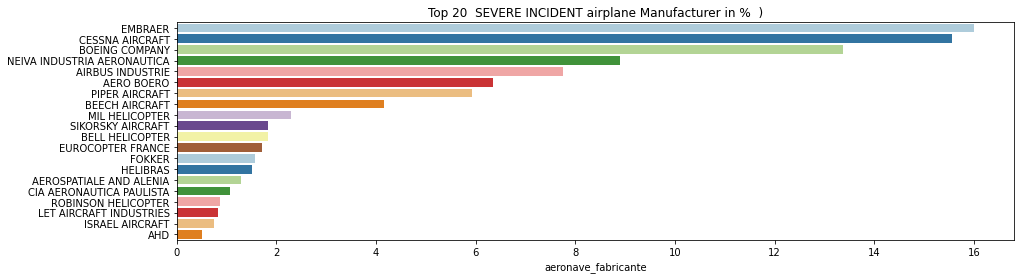

In [329]:
aux = df1[df1.ocorrencia_classificacao == ('INCIDENTE GRAVE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index, palette= "Paired" );
plt.title("Top 20  SEVERE INCIDENT airplane Manufacturer in %  )");

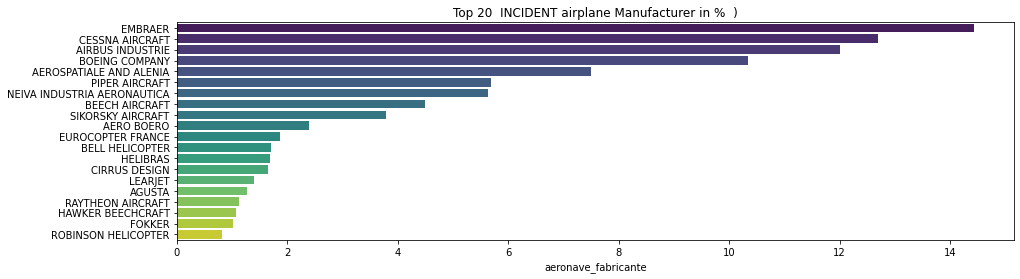

In [330]:
aux = df1[df1.ocorrencia_classificacao == ('INCIDENTE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index, palette= "viridis" );
plt.title("Top 20  INCIDENT airplane Manufacturer in %  )");

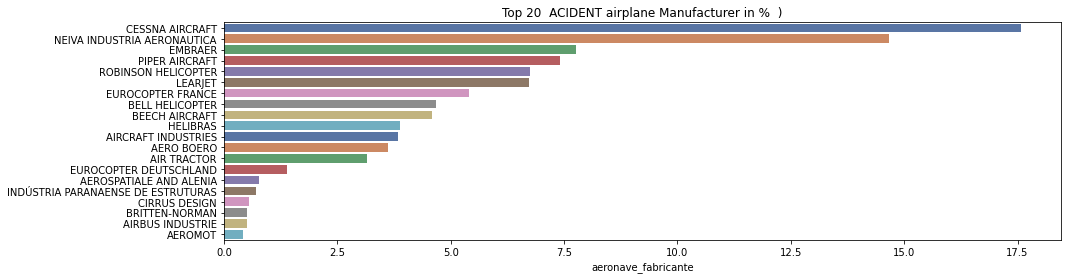

In [328]:
aux = df1[df1.ocorrencia_classificacao == ('ACIDENTE' )]
aux1 = (aux.aeronave_fabricante.value_counts(normalize = True)*100).to_frame()[:20]

fig = plt.subplots(figsize = (15,4))

sns.barplot(x= aux1.aeronave_fabricante, y = aux1.index, palette="deep"  );
plt.title("Top 20  ACIDENT airplane Manufacturer in %  )");

#### By City and state

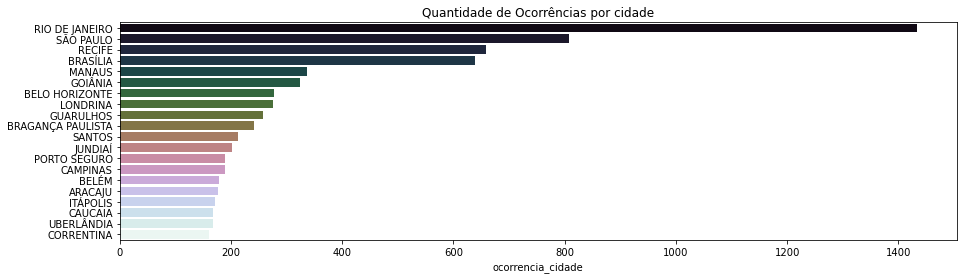

In [332]:
fig = plt.subplots(figsize = (15,4))
city_total = df1.ocorrencia_cidade.value_counts().to_frame()
city_total = city_total.sort_values('ocorrencia_cidade', ascending = False).iloc[:20]

sns.barplot(x= city_total.ocorrencia_cidade, y = city_total.index ,palette="cubehelix");
plt.title("Quantidade de Ocorrências por cidade");

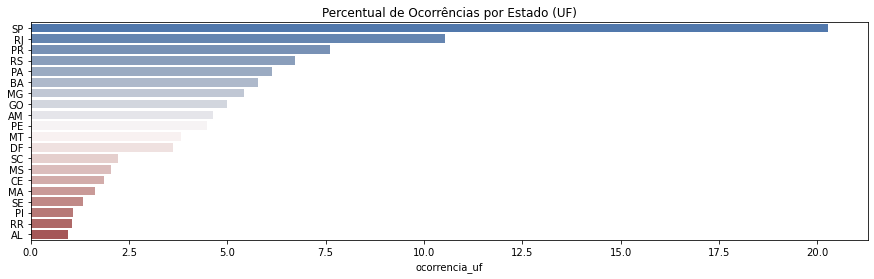

In [18]:
fig = plt.subplots(figsize = (15,4))
uf_total = df1.ocorrencia_uf.value_counts(normalize= True).to_frame()
uf_total = uf_total.sort_values('ocorrencia_uf', ascending = False).iloc[:20]

sns.barplot(x= uf_total.ocorrencia_uf*100, y = uf_total.index ,palette="vlag");
plt.title("Percentual de Ocorrências por Estado (UF)");

#### By Classification X published report

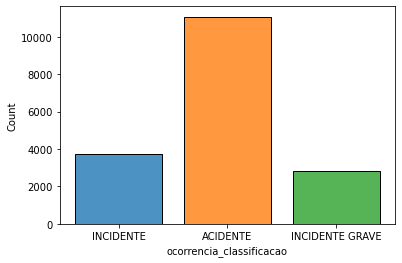

In [334]:

sns.histplot(data=df1, x="ocorrencia_classificacao", hue="ocorrencia_classificacao", shrink=.8, alpha=.8, legend=False);

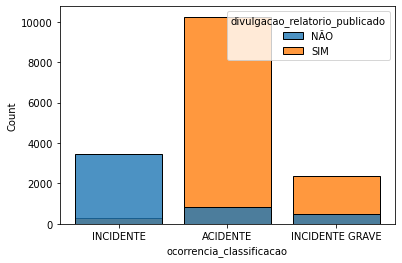

In [335]:
# ocorrencia X relatório
sns.histplot(data=df1, x="ocorrencia_classificacao", hue="divulgacao_relatorio_publicado", shrink=.8, alpha=.8, legend=True);

In [21]:
# relação divulgacao_relatorio_publicado X gravidade 
df1.divulgacao_relatorio_publicado == 'NÃO'
df1.groupby(['divulgacao_relatorio_publicado',  'ocorrencia_classificacao'])[  'ocorrencia_classificacao'].agg([ 'count'])

count
divulgacao_relatorio_publicado ocorrencia_classificacao       
NÃO                            ACIDENTE                    820
                               INCIDENTE                  3440
                               INCIDENTE GRAVE             484
SIM                            ACIDENTE                  10248
                               INCIDENTE                   292
                               INCIDENTE GRAVE            2362

In [22]:
pd.crosstab(index = [ df1.divulgacao_relatorio_publicado], columns= [df1.ocorrencia_classificacao], normalize = True).T.style.highlight_max(color = 'lightgreen', axis = 1)

divulgacao_relatorio_publicado,NÃO,SIM
ocorrencia_classificacao,,
ACIDENTE,0.046469,0.580755
INCIDENTE,0.194945,0.016548
INCIDENTE GRAVE,0.027428,0.133855


#### Aicraft type 

In [23]:
# %  fatalidades em acidentes, incidentes e incidente grave por tipo 
pd.crosstab(index= [df1.aeronave_tipo_veiculo], columns=[df1['ocorrencia_classificacao'], df1.aeronave_fatalidades_total], normalize = True).T.style.highlight_max(color = 'lightgreen', axis = 1)

- Aviões tem mais ocorrências, seguido de helicópteros, inclusive em nr de fatalidades,
com exceção quanto o nr de fatalidade =8 que o helicoptero lidera
Teria relação com peso? 

#### Number of Aircrafts involved

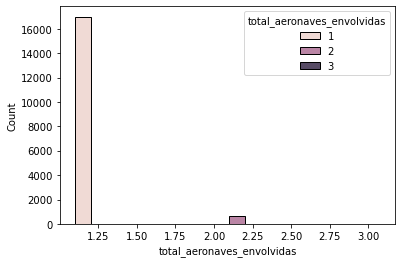

In [337]:
sns.histplot(data= df1, x= df1.total_aeronaves_envolvidas, hue= df1.total_aeronaves_envolvidas, shrink=.8, alpha=.8, legend=True );

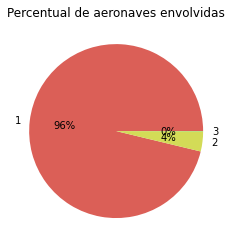

In [361]:
perc_nr_aircraft =df1.total_aeronaves_envolvidas.value_counts(normalize= True).to_frame()
colors = sns.color_palette('hls')
plt.pie(perc_nr_aircraft.total_aeronaves_envolvidas,labels = perc_nr_aircraft.index,colors = colors,  autopct='%.0f%%');
plt.title("Percentual de aeronaves envolvidas");

#### by Type and Category

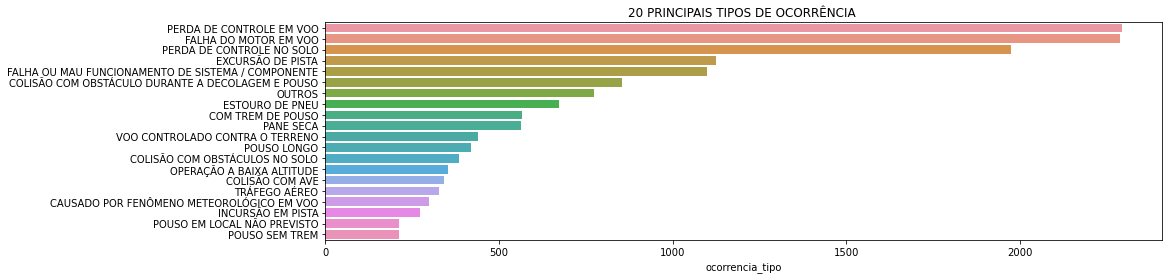

In [26]:
aux_tipo = df1.ocorrencia_tipo.value_counts()[:20].to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= aux_tipo.ocorrencia_tipo, y = aux_tipo.index );
plt.title("20 PRINCIPAIS TIPOS DE OCORRÊNCIA ");

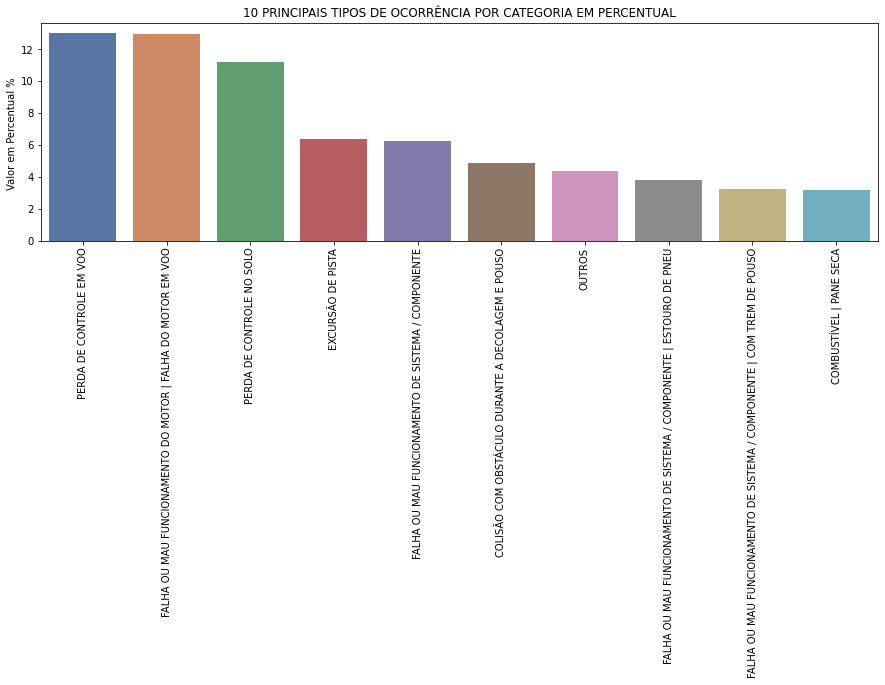

In [27]:
aux_tipo_categoria = df1.ocorrencia_tipo_categoria.value_counts(normalize= True)[:10].to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= aux_tipo_categoria.index , y = aux_tipo_categoria.ocorrencia_tipo_categoria*100,palette="deep" );
plt.ylabel("Valor em Percentual % ");
plt.title("10 PRINCIPAIS TIPOS DE OCORRÊNCIA POR CATEGORIA EM PERCENTUAL");
plt.xticks(rotation=90);

In [28]:
# Os 6 primeiros já Representam 48% dos tipos por categoria
df1.ocorrencia_tipo_categoria.value_counts(normalize= True).iloc[:6].sum()

0.5460727643658619

#### Taxonomia_tipo_icao

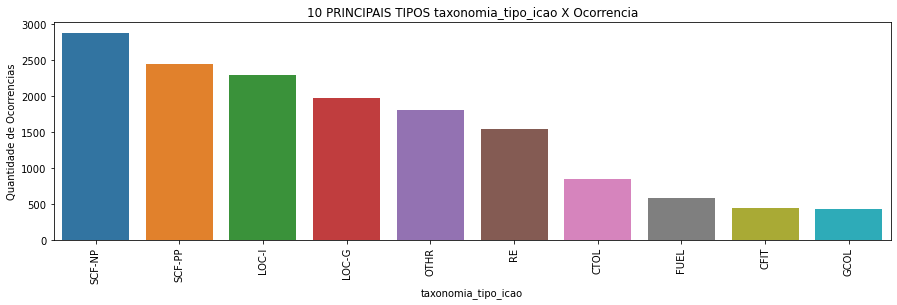

In [362]:
# Taxonomia_tipo_icao X classificação_ocorrencia
names_taxonomia = df1.taxonomia_tipo_icao.value_counts(normalize= True)[:10].index
aux_ta= df1.loc[df1.taxonomia_tipo_icao.isin(names_taxonomia), :]
group_taxonomia =aux_ta.groupby(['taxonomia_tipo_icao'] )['ocorrencia_classificacao'].count().sort_values(ascending=False).to_frame()

fig = plt.subplots(figsize = (15,4))
sns.barplot(x= group_taxonomia.index , y = group_taxonomia.ocorrencia_classificacao );
plt.ylabel("Quantidade de Ocorrencias");
plt.title("10 PRINCIPAIS TIPOS taxonomia_tipo_icao X Ocorrencia");
plt.xticks(rotation=90);

####  By aircraft type X nivel de Dano


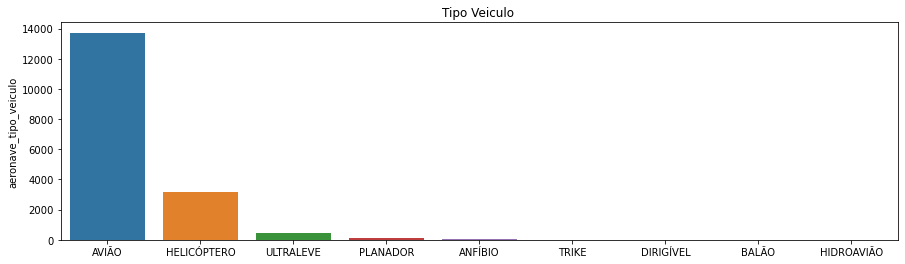

In [387]:
data = df1.aeronave_tipo_veiculo.value_counts().to_frame()
bar_plot_quantity_value_counts(data, 'aeronave_tipo_veiculo' , 'Tipo Veiculo ')

In [392]:
# In Percentage
df1.aeronave_tipo_veiculo.value_counts(normalize = True)

AVIÃO          0.785567
HELICÓPTERO    0.181985
ULTRALEVE      0.024322
PLANADOR       0.005608
ANFÍBIO        0.002003
TRIKE          0.000286
DIRIGÍVEL      0.000114
BALÃO          0.000057
HIDROAVIÃO     0.000057
Name: aeronave_tipo_veiculo, dtype: float64

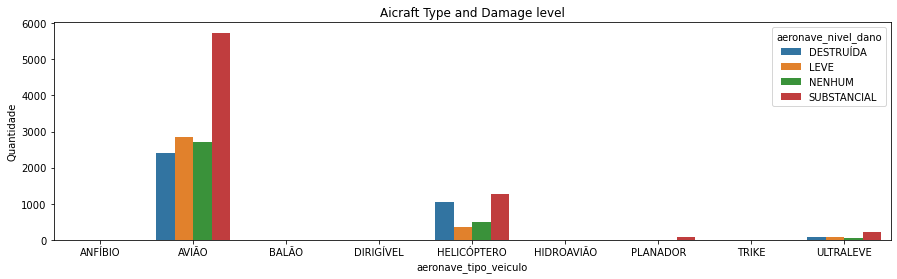

In [265]:
sub_type = df1[df1.aeronave_tipo_veiculo.isin(['AVIÃO','HELICÓPTERO', 'ULTRALEVE','PLANADOR'])]
aux = sub_type.groupby(['aeronave_tipo_veiculo','aeronave_nivel_dano' ])['aeronave_tipo_veiculo'].agg( Quantidade=('count')).reset_index()

fig = plt.subplots(figsize = (15,4))

sns.barplot(y="Quantidade", 
x="aeronave_tipo_veiculo", 
hue="aeronave_nivel_dano", 
data=aux);

plt.title('Aicraft Type and Damage level');

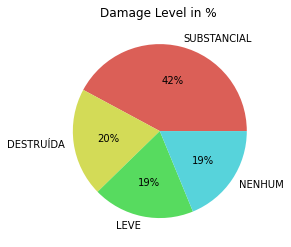

In [452]:
nivel_damage = df1.aeronave_nivel_dano.value_counts(normalize= True).to_frame()
colors = sns.color_palette('hls')
plt.pie(nivel_damage.aeronave_nivel_dano,labels = nivel_damage.index,colors = colors,  autopct='%.0f%%');
plt.title("Damage Level in % ");

#### Engine type and quantity

Text(0.5, 1.0, 'Engine quantity and type')

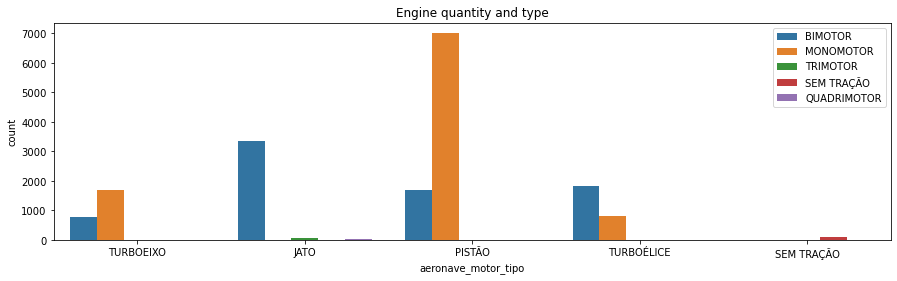

In [473]:

fig = plt.subplots(figsize = (15,4))
sns.countplot( x= 'aeronave_motor_tipo', hue='aeronave_motor_quantidade', data = df1 );
plt.legend(loc='upper right');
plt.title('Engine quantity and type');
            

#### Aircraft Register - Category and Segmentation

<ipython-input-502-87e1c6c8bf34>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



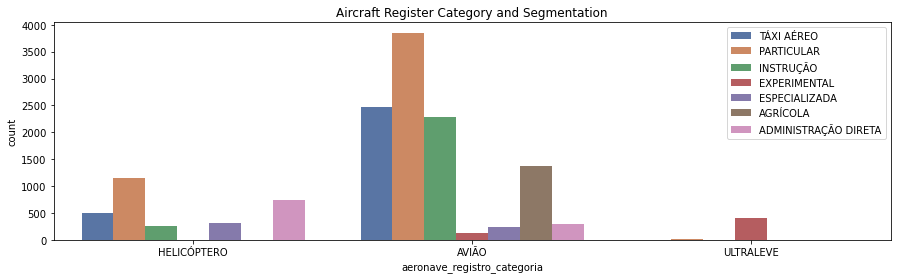

In [502]:
sub_category = df1[df1['aeronave_registro_categoria'].isin(['AVIÃO', 'HELICÓPTERO', 'ULTRALEVE'])][df1['aeronave_registro_segmento'].isin(['PARTICULAR', 'TÁXI AÉREO', 'REGULAR ','INSTRUÇÃO','AGRÍCOLA','ADMINISTRAÇÃO DIRETA' ,'EXPERIMENTAL','ESPECIALIZADA'])]
fig = plt.subplots(figsize = (15,4))
sns.countplot( x= 'aeronave_registro_categoria', hue='aeronave_registro_segmento', data = sub_category , palette= 'deep');
plt.legend(loc='upper right');
plt.title('Aircraft Register Category and Segmentation');

#### Operation Type

In [537]:
sub_category.groupby(['aeronave_registro_categoria', 'aeronave_tipo_operacao'])['aeronave_tipo_operacao'].agg(Quantity = 'count').sort_values('Quantity', ascending = False)

Quantity
aeronave_registro_categoria aeronave_tipo_operacao          
AVIÃO                       PRIVADA                     3582
                            TÁXI AÉREO                  2419
                            INSTRUÇÃO                   2231
                            AGRÍCOLA                    1779
HELICÓPTERO                 PRIVADA                     1155
                            POLICIAL                     721
                            TÁXI AÉREO                   496
                            ESPECIALIZADA                273
                            INSTRUÇÃO                    250
ULTRALEVE                   EXPERIMENTAL                 207
                            PRIVADA                      203
AVIÃO                       POLICIAL                     196
                            ESPECIALIZADA                134
                            NÃO REGULAR                  107
                            EXPERIMENTAL                  89
HELICÓPTERO                 AGRÍCOLA                      16
                            NÃO REGULAR                    6
ULTRALEVE                   INSTRUÇÃO                      4
AVIÃO                       REGULAR                        3
HELICÓPTERO                 EXPERIMENTAL                   2
                            REGULAR                        1

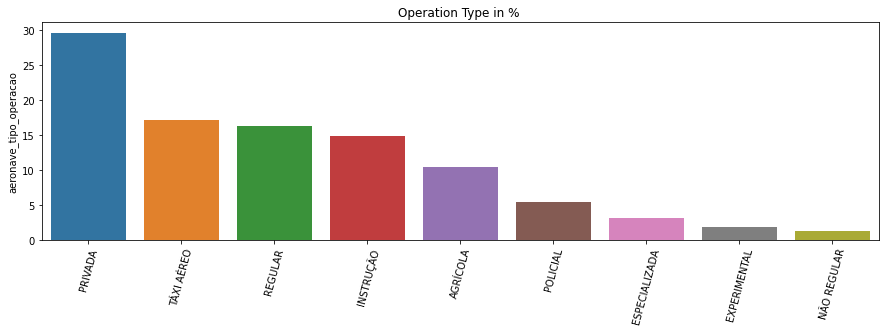

In [541]:
operation_type = (df1.aeronave_tipo_operacao.value_counts(normalize= True)*100).to_frame()
bar_plot_quantity_value_counts(operation_type, 'aeronave_tipo_operacao' , 'Operation Type in % ')
plt.xticks(rotation=75);

#### Flight Origin and Destination

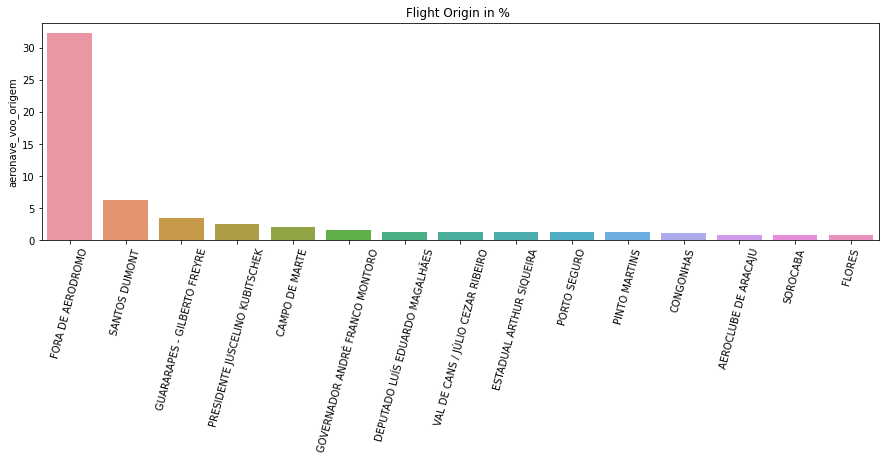

In [515]:
data = (df1.aeronave_voo_origem.value_counts(normalize= True)*100).to_frame()[:15]
bar_plot_quantity_value_counts(data, 'aeronave_voo_origem' , 'Flight Origin in % ')
plt.xticks(rotation=75);

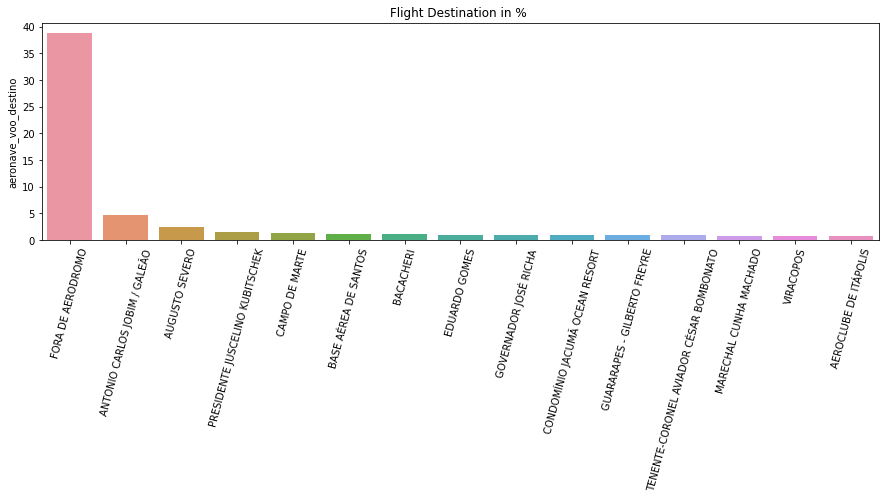

In [516]:
data = (df1.aeronave_voo_destino.value_counts(normalize= True)*100).to_frame()[:15]
bar_plot_quantity_value_counts(data, 'aeronave_voo_destino' , 'Flight Destination in % ')
plt.xticks(rotation=75);

#### Flight operation phase

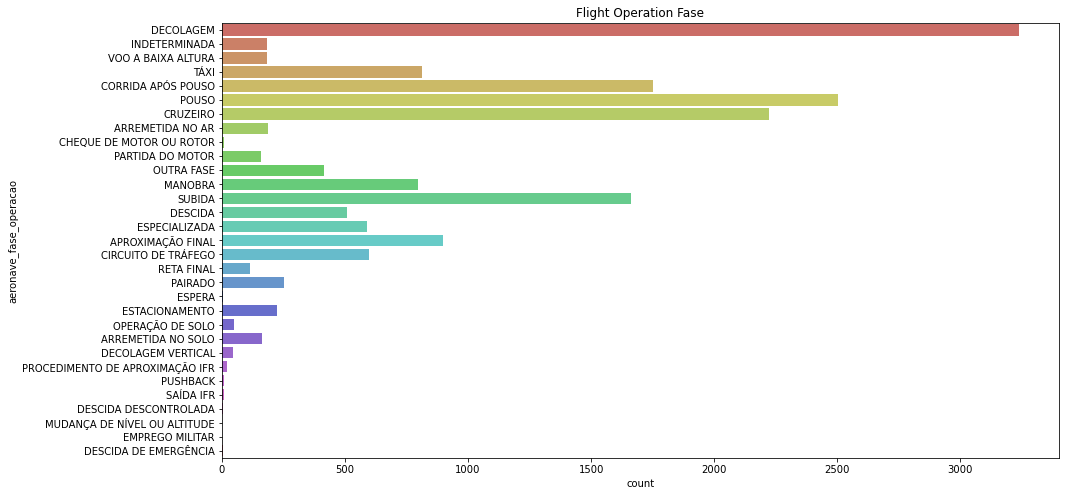

In [535]:
fig = plt.subplots(figsize = (15,8))
sns.countplot( y= 'aeronave_fase_operacao',  data = df1 , palette= 'hls');
plt.title('Flight Operation Fase');


#### Fator_aspecto 

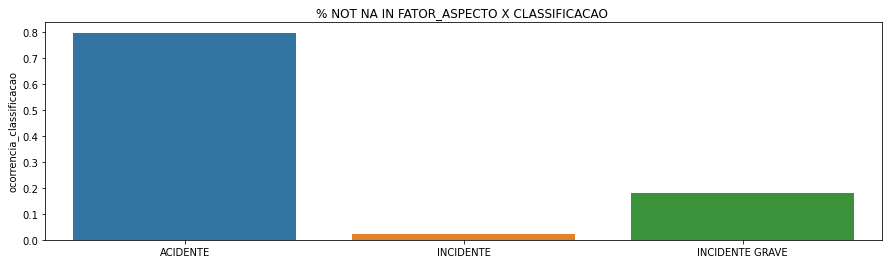

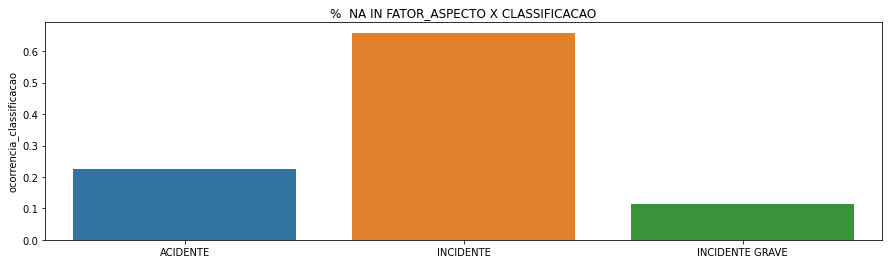

In [202]:
f_aspecto_notna = df1[df1.fator_aspecto.notna()]['ocorrencia_classificacao'].value_counts(normalize=True).to_frame()
f_aspecto_isna = df1[df1.fator_aspecto.isna()]['ocorrencia_classificacao'].value_counts(normalize=True).to_frame()

bar_plot_quantity_value_counts(f_aspecto_notna, 'ocorrencia_classificacao' , '% NOT NA IN FATOR_ASPECTO X CLASSIFICACAO ')
bar_plot_quantity_value_counts(f_aspecto_isna, 'ocorrencia_classificacao' , '%  NA IN FATOR_ASPECTO X CLASSIFICACAO')


In [183]:

pd.pivot_table(df1, values=['ocorrencia_cidade'], index= ['fator_aspecto'], columns=['ocorrencia_classificacao'], aggfunc='count')

ocorrencia_cidade            \
ocorrencia_classificacao                                ACIDENTE INCIDENTE   
fator_aspecto                                                                
ASPECTO DE FABRICAÇÃO                                         50         7   
ASPECTO DE MANUSEIO DO MATERIAL                                3         0   
ASPECTO DE PROJETO                                            34         2   
ASPECTO MÉDICO                                               199         0   
ASPECTO PSICOLÓGICO                                         3867        72   
DESEMPENHO DO SER HUMANO                                    5162       144   
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL               239         8   
ERGONOMIA                                                     20         0   
INFRAESTRUTURA AEROPORTUÁRIA                                 126        35   
INFRAESTRUTURA DE TRÁFEGO AÉREO                               13        11   
OUTRO                                                        168         0   

                                                                
ocorrencia_classificacao                       INCIDENTE GRAVE  
fator_aspecto                                                   
ASPECTO DE FABRICAÇÃO                                       14  
ASPECTO DE MANUSEIO DO MATERIAL                              6  
ASPECTO DE PROJETO                                          20  
ASPECTO MÉDICO                                              39  
ASPECTO PSICOLÓGICO                                        644  
DESEMPENHO DO SER HUMANO                                  1287  
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL              60  
ERGONOMIA                                                   18  
INFRAESTRUTURA AEROPORTUÁRIA                                88  
INFRAESTRUTURA DE TRÁFEGO AÉREO                              9  
OUTRO                                                       60

#### Fator aspecto X fator_condicionante X fator área

Falta de treinamento?

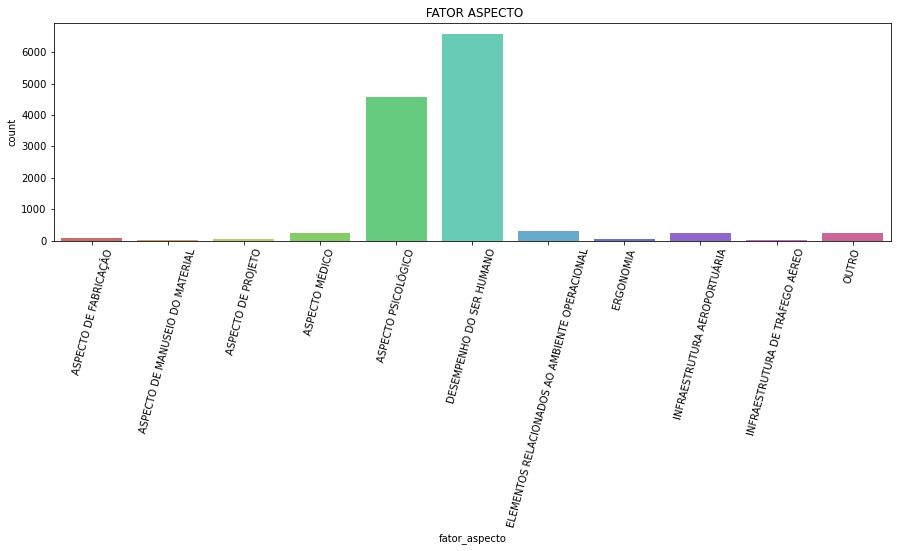

In [243]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_aspecto', data= df1, palette= "hls");
plt.title(' FATOR ASPECTO')
plt.xticks(rotation=75);

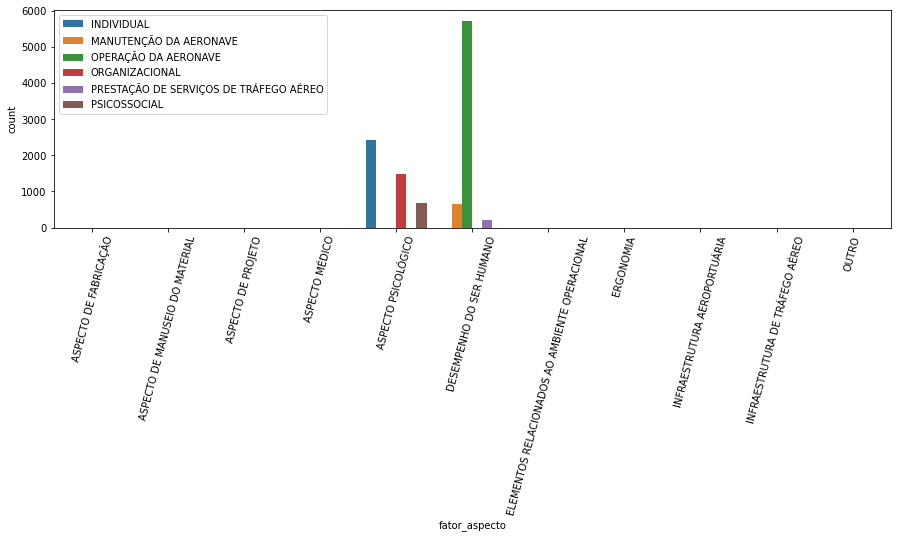

In [250]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_aspecto', hue='fator_condicionante', data= df1);
plt.legend('  FATOR ASPECTO X FATOR CONDICIONANTE')
plt.xticks(rotation=75);
plt.legend(loc= 'upper left');


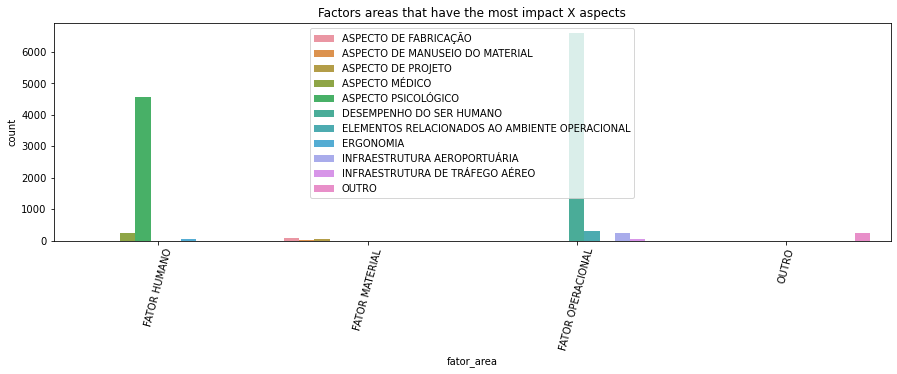

In [264]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x= 'fator_area', hue='fator_aspecto', data= df1);
plt.xticks(rotation=75);
plt.title('Factors areas that have the most impact X aspects');
plt.legend(loc= 'upper center');

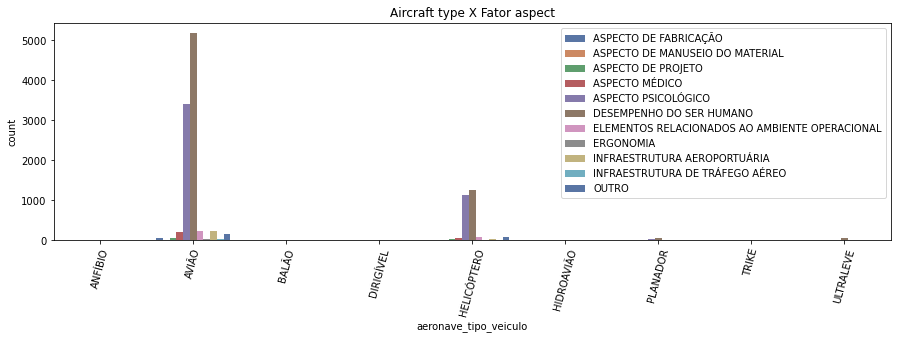

In [275]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'aeronave_tipo_veiculo', hue='fator_aspecto', data= sub_type, palette= 'deep');
plt.xticks(rotation=75);
plt.title('Aircraft type X Fator aspect');
plt.legend(loc= 'upper right');

#### recomendation content

In [319]:

df1.groupby('recomendacao_conteudo')['recomendacao_conteudo'].agg(frequencia_nr='count').sort_values('frequencia_nr', ascending = False)[:30]

,frequencia_nr
recomendacao_conteudo,
"""Realizar o treinamento inicial e recorrente de """"Falha do Motor Durante a Decolagem - Depois da V1"""", de acordo com o L 410 Aircraft Pilot Type Training Program, item 5, páginas 13 e 14.""",72
"Realizar o treinamento de emergências durante o treinamento inicial, parte prática de solo, conforme o Programa de Treinamento do fabricante (L 410 Aircraft Pilot Type Training Program), item B, página 10.",72
"Estabelecer e manter um sistema continuado de análise e supervisão da execução e da eficiência de seu programa de inspeções e de seus programas de manutenção, manutenção preventiva, modificações e reparos, objetivando corrigir eventuais deficiências desses programas, mesmo que eles sejam realizados por terceiros, conforme estabelecido em RBAC 135.431 (a).",38
"Realizar auditoria especial na empresa Target Aviação Ltda. a fim de verificar a adequação dos meios e dos procedimentos de manutenção empregados na manutenção de componentes aeronáuticos e de aeronaves, em conformidade com a regulamentação em vigor.",38
Adotar procedimentos com a finalidade de reduzir a possibilidade de outros ocupantes das aeronaves interferirem na atenção dos pilotos durante a execução dos procedimentos nas diversas fases de voo.,38
"Reavaliar a aceitação do conteúdo do MGO da Oceanair Táxi-Aéreo Ltda., com a finalidade de adequá-lo aos requisitos estabelecidos no RBAC 135, quanto às atribuições do responsável pelo setor de manutenção referentes à supervisão e análise dos registros de manutenção.",38
"Reavaliar a aceitação do conteúdo do MGO da Oceanair Táxi Aéreo Ltda., com a finalidade de adequá-lo aos requisitos estabelecidos no RBAC 135, quanto à utilização de manuais na língua inglesa e, nesses casos, quanto à proficiência exigida para mecânicos e pilotos.",38
"Desenvolver o Manual de Procedimentos Especiais (MPE) previsto em seu MGO e demais procedimentos específicos (SOP), necessários para elevar o nível de padronização, de forma a atingir uma melhor atuação no gerenciamento dos recursos de cabine.",38
"Desenvolver Listas de Equipamentos Mínimos (MEL) para os modelos de aeronaves de sua frota, para assegurar a continuidade das operações em condições de riscos aceitáveis, nos casos de panes de instrumentos ou de equipamentos.",38


#### recomendacao_destinatario_sigla

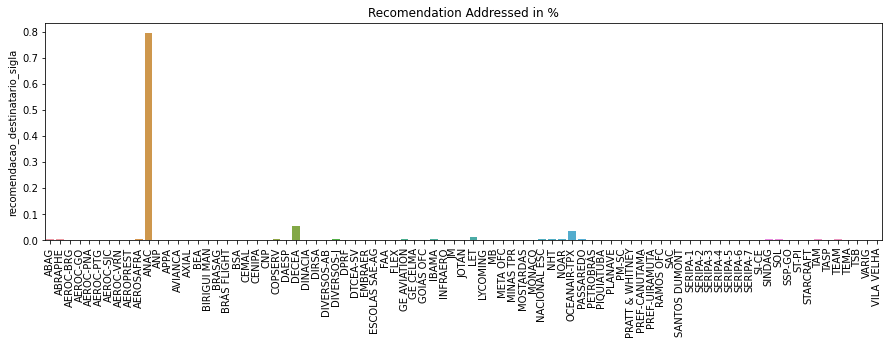

In [367]:
recomendation_address = df1.recomendacao_destinatario_sigla.value_counts(normalize= True).to_frame()

bar_plot_quantity_value_counts(recomendation_address, 'recomendacao_destinatario_sigla' , 'Recomendation Addressed in %')
plt.xticks(rotation = 90);



#### recomendation_status

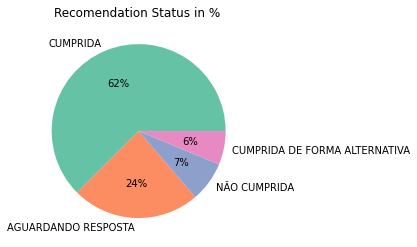

In [383]:
recomendation_status = df1.recomendacao_status.value_counts(normalize= True).to_frame()
colors = sns.color_palette('Set2')
plt.pie(recomendation_status.recomendacao_status,labels = recomendation_status.index,colors = colors,  autopct='%.0f%%');
plt.title("Recomendation Status in % ");

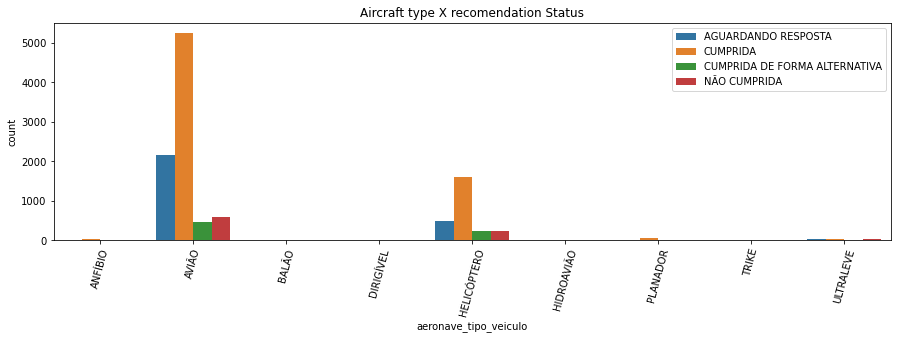

In [376]:
fig = plt.subplots(figsize = (15,4))

sns.countplot(x= 'aeronave_tipo_veiculo', hue='recomendacao_status', data= df1 );
plt.xticks(rotation=75);
plt.title('Aircraft type X recomendation Status');
plt.legend(loc= 'upper right');

## 1.3. Data Types

### Alterando os tipos dos dados para facilitar a manipulação de dados e reduzir o uso de recursos computacionais

In [44]:
df1.dtypes

ocorrencia_classificacao            object
ocorrencia_latitude                 object
ocorrencia_longitude                object
ocorrencia_cidade                   object
ocorrencia_uf                       object
ocorrencia_aerodromo                object
ocorrencia_dia                      object
ocorrencia_hora                     object
investigacao_aeronave_liberada      object
investigacao_status                 object
divulgacao_relatorio_numero         object
divulgacao_relatorio_publicado      object
divulgacao_dia_publicacao           object
total_recomendacoes                  int64
total_aeronaves_envolvidas           int64
ocorrencia_saida_pista              object
ocorrencia_tipo                     object
ocorrencia_tipo_categoria           object
taxonomia_tipo_icao                 object
aeronave_matricula                  object
aeronave_operador_categoria         object
aeronave_tipo_veiculo               object
aeronave_fabricante                 object
aeronave_mo

In [45]:
#ocorrencia_dia - mudar para datetime 
df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')
df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%Y-%m-%d')


# recomendacao_dia_encaminhamento - 0 se dia for data com má formato 
df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: 0 if ((x == '0002-11-29') or( x =='0002-11-24')or (x == '0002-11-17') or (x == '0002-11-27') or (x == '0002-11-26')) else x )
df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


#recomendacao_dia_feedback
df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply(lambda x: 0 if ((x == '0000-00-00') or (x == '0002-11-29') or (x == '0002-11-21') or (x == '0002-11-23')) else x)
df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

#recomendacao_dia_assinatura
df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')

In [46]:
# convertendo os dados numéricos
for c in df1.select_dtypes( include=['int64'] ):
    df1[c] = df1[c].astype('int32')
    


In [47]:
# 35  aeronave_assentos                17646 non-null  int32  
# aeronave_assentos - 0 para na - lidarei com os na mais tarde
df1['aeronave_assentos'].fillna(0, inplace=True )
df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

# convertendo os dados categóricos
for c in df1.select_dtypes( include=['object'] ):
    df1[c] = df1[c].astype('category')

In [48]:
df1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17646 entries, 0 to 17645
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ocorrencia_classificacao         17646 non-null  category      
 1   ocorrencia_latitude              15010 non-null  category      
 2   ocorrencia_longitude             15007 non-null  category      
 3   ocorrencia_cidade                17646 non-null  category      
 4   ocorrencia_uf                    17642 non-null  category      
 5   ocorrencia_aerodromo             9663 non-null   category      
 6   ocorrencia_dia                   17646 non-null  datetime64[ns]
 7   ocorrencia_hora                  17645 non-null  category      
 8   investigacao_aeronave_liberada   12475 non-null  category      
 9   investigacao_status              17292 non-null  category      
 10  divulgacao_relatorio_numero      13600 non-null  category 

# 2. Data Preprocessing

In [114]:
df2 = df1.copy()

## 2.1. Check NA

In [115]:
df2.isna().mean()*100

ocorrencia_classificacao            0.000000
ocorrencia_latitude                14.938230
ocorrencia_longitude               14.955231
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.022668
ocorrencia_aerodromo               45.239714
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.005667
investigacao_aeronave_liberada     29.304092
investigacao_status                 2.006120
divulgacao_relatorio_numero        22.928709
divulgacao_relatorio_publicado      0.000000
divulgacao_dia_publicacao          26.861612
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia_tipo                     0.000000
ocorrencia_tipo_categoria           0.000000
taxonomia_tipo_icao                 0.000000
aeronave_matricula                  0.079338
aeronave_operador_categoria        82.817636
aeronave_tipo_veiculo               0.974725
aeronave_f

In [92]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Cols: {}'.format( df2.shape[1] ) )

Number of Rows: 17646
Number of Cols: 53


divulgacao_dia_publicacao

## 1.2  Fill Out NA

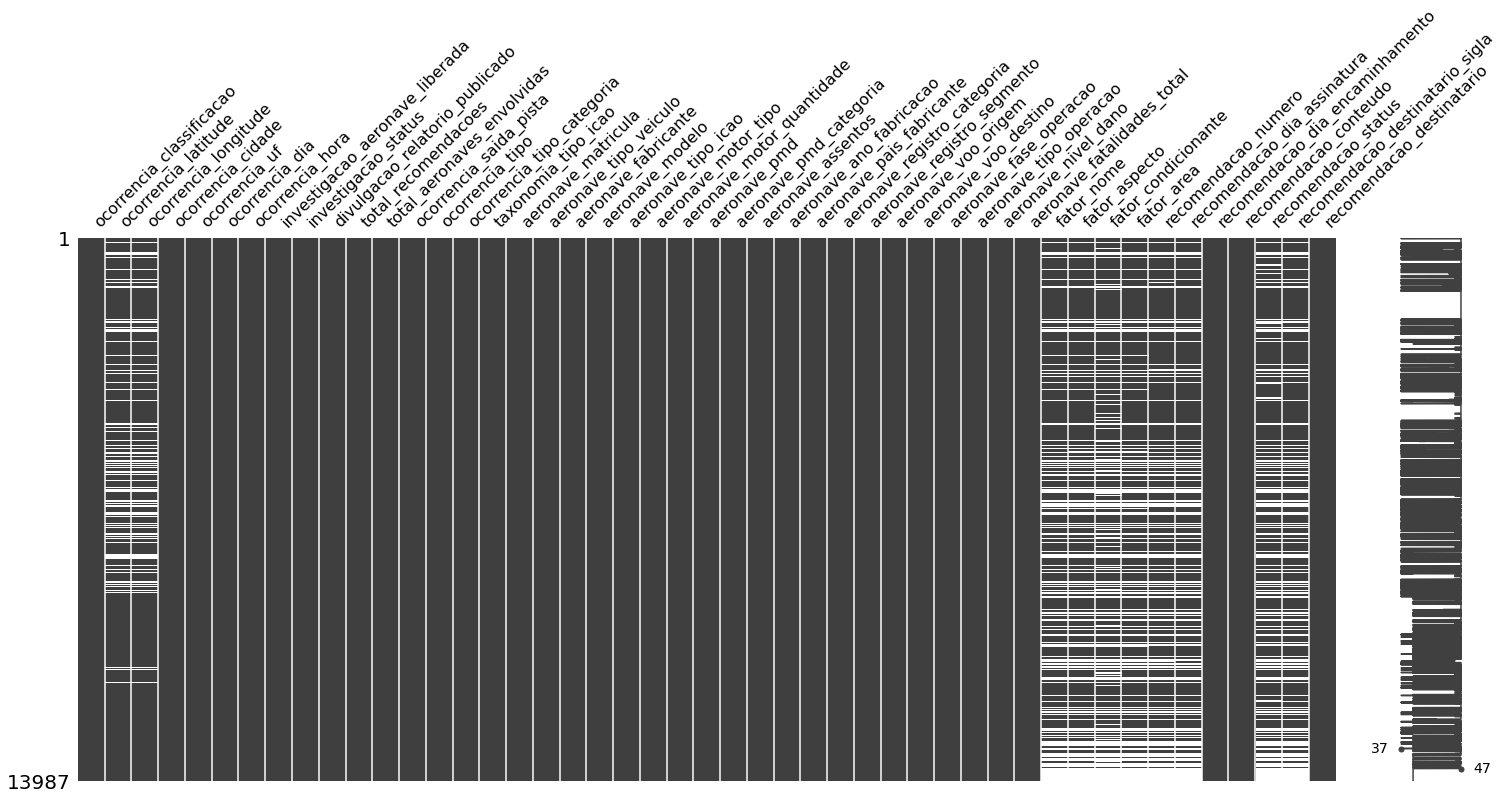

In [111]:
msno.matrix(df2)
plt.show()

strategy adopted:
- analyze the division of values ​​within the features and the percentage of nulls
- if the division within the feature is large between one class and another and the % of nulls is small, I add the nulls to the most frequent feature
- if there is an impact when aggregating nulls to some feature class, drop na´s 
- features occurrence_latitude and longitude NA´s  represent an average of 15%

In [116]:
## na for Most frequent
#ocorrencia_uf - most frequent
df2.ocorrencia_uf.fillna(df2.ocorrencia_uf.value_counts().index[0], inplace=True)

#aeronave_matricula - most frequent
df2.aeronave_matricula.fillna(df2.aeronave_matricula.value_counts().index[0], inplace=True)

#df2.investigacao_status
df2.investigacao_status.fillna(df2.investigacao_status.value_counts().index[0], inplace=True)

# aeronave_tipo_veiculo
df2.aeronave_tipo_veiculo.fillna(df2.aeronave_tipo_veiculo.value_counts().index[0], inplace=True)

#aeronave_motor_tipo
df2.aeronave_motor_tipo.fillna(df2.aeronave_motor_tipo.value_counts().index[0], inplace=True)

# aeronave_motor_quantidade
df2.aeronave_motor_quantidade.fillna(df2.aeronave_motor_quantidade.value_counts().index[0], inplace=True)

#aeronave_registro_categoria
df2.aeronave_registro_categoria.fillna(df2.aeronave_registro_categoria.value_counts().index[0], inplace = True)

#aeronave_voo_origem e destino
df2.aeronave_voo_origem.fillna(df2.aeronave_voo_origem.value_counts().index[0], inplace = True)
df2.aeronave_voo_destino.fillna(df2.aeronave_voo_destino.value_counts().index[0], inplace = True)

#aeronave_fase_operacao
df2.aeronave_fase_operacao.fillna(df2.aeronave_fase_operacao.value_counts().index[0], inplace = True)

#aeronave_nivel_dano 
df2.aeronave_nivel_dano.fillna(df2.aeronave_nivel_dano .value_counts().index[0], inplace = True)






## drop na
#aeronave_fabricante      ocorrencia_hora     
df2.dropna(subset =['ocorrencia_hora', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_ano_fabricacao',  'aeronave_registro_segmento',  'aeronave_registro_categoria', 'aeronave_tipo_operacao'], inplace=True)





In [117]:
#investigacao_aeronave_liberada - Suposições:
## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
# NAO se divulgacao_relatorio_publicado == NAO 
# os na´s que sobreram drop =647 
df2.loc[ (df2['investigacao_aeronave_liberada'].isna()) & (df2['investigacao_status']== 'FINALIZADA') & (df2['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
df2.loc[ ( df2['investigacao_aeronave_liberada'].isna() ) & ( df2.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
df2.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)




# recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
df2.loc[ df1['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df2.loc[ df1['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

# para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
#recomendacao_dia_encaminhamento    5698
# não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
df2.loc[df1['recomendacao_dia_encaminhamento'].isna()  & (df2['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0


# set categoria
df2['recomendacao_conteudo'] = df2['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

# recomendacao_conteudo
df2.loc[df1['recomendacao_conteudo'].isna()  & (df2['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
# o restante vou dropar 
df2.dropna(subset =['recomendacao_conteudo'], inplace=True)


#set categoria
df2['recomendacao_destinatario'] = df1['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
# recomendacao_destinatario
df2.loc[df2['recomendacao_destinatario'].isna()  & (df2['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

### Excluindo as colunas duplicadas ou com muitos valores faltantes



In [387]:
df2.drop(['aeronave_operador_categoria', 'aeronave_pais_registro', 'ocorrencia_aerodromo', 'recomendacao_dia_feedback', 'divulgacao_relatorio_numero', 'ocorrencia_latitude', 'ocorrencia_longitude', 'fator_nome', 'recomendacao_numero'], axis=1, inplace=True)

KeyError: "['aeronave_operador_categoria' 'aeronave_pais_registro'\n 'ocorrencia_aerodromo' 'recomendacao_dia_feedback'\n 'divulgacao_relatorio_numero' 'ocorrencia_latitude'\n 'ocorrencia_longitude'] not found in axis"

In [211]:
df2.isna().mean()*100

ocorrencia_classificacao            0.000000
ocorrencia_cidade                   0.000000
ocorrencia_uf                       0.000000
ocorrencia_dia                      0.000000
ocorrencia_hora                     0.000000
investigacao_aeronave_liberada      0.000000
investigacao_status                 0.000000
divulgacao_relatorio_publicado      0.000000
total_recomendacoes                 0.000000
total_aeronaves_envolvidas          0.000000
ocorrencia_saida_pista              0.000000
ocorrencia_tipo                     0.000000
ocorrencia_tipo_categoria           0.000000
taxonomia_tipo_icao                 0.000000
aeronave_matricula                  0.000000
aeronave_tipo_veiculo               0.000000
aeronave_fabricante                 0.000000
aeronave_modelo                     0.000000
aeronave_tipo_icao                  0.000000
aeronave_motor_tipo                 0.000000
aeronave_motor_quantidade           0.000000
aeronave_pmd                        0.000000
aeronave_p

In [122]:
df2.fator_aspecto.isna().sum() #.value_counts()

4018

In [388]:
df2.divulgacao_relatorio_publicado.value_counts()

SIM    10015
NÃO     3972
Name: divulgacao_relatorio_publicado, dtype: int64

In [606]:
#df2.to_csv('./data/ocorrencias_aeronauticas_cleaned_ok.csv', index=False)

In [ ]:
#df_cleaned = pd.read_csv('./data/ocorrencias_aeronauticas_cleaned_ok.csv')

In [107]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Cols: {}'.format( df2.shape[1] ) )

Number of Rows: 13987
Number of Cols: 47


In [108]:
1398700/17646 -100


-20.735577467981415

In [121]:
df2.fator_aspecto.value_counts()

DESEMPENHO DO SER HUMANO                          5097
ASPECTO PSICOLÓGICO                               3929
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL     238
ASPECTO MÉDICO                                     187
OUTRO                                              180
INFRAESTRUTURA AEROPORTUÁRIA                       174
ASPECTO DE FABRICAÇÃO                               67
ASPECTO DE PROJETO                                  49
ERGONOMIA                                           23
INFRAESTRUTURA DE TRÁFEGO AÉREO                     20
ASPECTO DE MANUSEIO DO MATERIAL                      5
Name: fator_aspecto, dtype: int64

In [365]:

cat_attributes = df2.select_dtypes( exclude=['int32', 'float64', 'datetime64[ns]'] )


cat_attributes.drop(['recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'divulgacao_dia_publicacao'], axis=1, inplace=True)

C:\Users\ACER\anaconda3\envs\datasciencemproducao\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 1.6.2 Categorical Attributes

In [ ]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

In [ ]:
sns.catplot(data=df1, x="aeronave_assentos", y="ocorrencia_classificacao", kind="box");

In [ ]:
#ocorrencia_classificacao 
sns.catplot(data=df1, x="aeronave_assentos", y="aeronave_nivel_dano", hue="ocorrencia_saida_pista", kind="bar");

In [ ]:
sns.catplot(data=df1, y="aeronave_registro_categoria", x="aeronave_ano_fabricacao" , kind="bar");


In [ ]:
aux = df1.loc[df1.aeronave_motor_tipo != ("***"), :]
fig = plt.subplots(figsize = (15,4))
sns.countplot(x = 'aeronave_motor_tipo', data = aux);

In [ ]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='ocorrencia_uf', data = df1);

# 2.0 FEATURE ENGINEERING

In [ ]:
df2 = df1.copy()

## 2.1 Criacao das Hipoteses

**Avião**
- Aviões com mais motores sofrem menos acidentes ? aeronave_motor_quantidade
- Aviões particulares sofrem mais acidentes que o resto ? aeronave_operador_categoria, aeronave_tipo_operacao
- Em Aeronaves mais novas há menos ocorrência ?  
- Modelo da aeronave influencia? 
- Monomotor e bimotor tem mais ocorrencias ? (Quantidade de Turbinas) aeronave_motor_quantidade
- Qualidade do combustível (fornecedor)
- Helicopteros sofrem mais ocorrencias que aviões comuns  ? Deste quais são considerados mais graves?  aeronave_nivel_dano aeronave_registro_categoria
- Quanto mais assentos menos há a ocorrência de acidentes ? São menos graves ? aeronave_assentos, ocorrencia_classificacao

**Fator Humano** 
- Anos de Experiência dos pilotos influencia na gravidade do acidente?
- Treinamento constante (mínimo 2 x ano) inibem ocorrencias?
- Fator humano é a causa principal das ocorrencias?

**Fase no vôo**
- No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? aeronave_fase_operacao

**Peças**
- quais as peças que dão mais acidente
- Peso do avião (excesso ou falta de carga)?
- Excesso de carga ?
- Origem das peças usadas na manutenção.

**Ambiente**
- Temperatura
- Humindade do ar
- Velocidade do vento

- No Sudeste tem menos acidente que no resto do país (frequencia relativa)? 
- Final da tarde tem mais acidente por conta do escurecer? (das 16hs as 20hs ) ocorrencia_hora


## 2.1.1 Seleção Hipoteses

**Fase no vôo**
- No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? aeronave_fase_operaca

**Ambiente/Região" 
- No Sudeste tem menos acidente que no resto do país (frequencia relativa)? 
- Final da tarde tem mais acidente por conta do escurecer? (das 16hs as 20hs ) ocorrencia_hora

**Fator Humano** 
- Fator humano é a causa principal das ocorrencias?

**Avião**
- Aviões com mais motores sofrem menos acidentes ? aeronave_motor_quantidade
- Aviões particulares sofrem mais acidentes que o resto ? aeronave_operador_categoria, aeronave_tipo_operacao
- Em Aeronaves mais novas há menos ocorrência ?  
- Modelo da aeronave influencia? 
- Monomotor e bimotor tem mais ocorrencias ? (Quantidade de Turbinas) aeronave_motor_quantidade
- Qualidade do combustível (fornecedor)
- Helicopteros sofrem mais ocorrencias que aviões comuns  ? Deste quais são considerados mais graves?  aeronave_nivel_dano aeronave_registro_categoria
- Quanto mais assentos menos há a ocorrência de acidentes ? São menos graves ? aeronave_assentos, ocorrencia_classificacao



## 2.1.2 Feature Engineering

# 3.0 FILTRAGEM DE VARIÁVEIS

In [ ]:
df3 = df2.loc[(df2['ocorrencia_latitude'] != "***") & (df2['ocorrencia_longitude'] != "***") & (df2.aeronave_motor_tipo != "***") & (df2.aeronave_nivel_dano != "***"), :]

## 3.1. Filtragem das Linhas

In [ ]:
df3 = df3[( df3["aeronave_motor_tipo"] != "***" ) & ( df3["aeronave_registro_categoria"] != "***" )  ] 

# 4.0 ANALISE EXPLORATORIA DOS DADOS

In [ ]:
df4 = df3.copy()

## 4.1. Analises

In [ ]:
num_attributes.hist( bins=25 );

In [ ]:
heat = df4.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(heat, annot=True)

## 4.2. Analise das Hipóteses

### H.1 - No processo de decolagem ocorrem mais acidentes ? A frequencia também é maior se comparado ao pouso? 
***VERDADEIRO** Sim, to total 18.63% referem-se a decolagem e somente 13,03% no Pouso 

In [ ]:
fig = plt.subplots(figsize = (15,4))
sns.countplot(x ='aeronave_fase_operacao', data = df1)
plt.xticks(rotation=-80);

In [ ]:
df4.aeronave_fase_operacao.value_counts()

### H.2 No Sudeste tem menos acidente que no resto do país?
***FALSO*** No sudeste são concentrados aprox. 37% das ocorrências, apesar de SP e RJ terem um maior número de casos.

In [ ]:
fig = plt.subplots(figsize = (20,8))
df4.ocorrencia_uf.value_counts().plot.barh();

In [ ]:
df4.ocorrencia_uf.value_counts()

In [ ]:
sudeste = df4[(df4.ocorrencia_uf == 'SP') | (df4.ocorrencia_uf == 'RJ')  | (df4.ocorrencia_uf == 'ES') | (df4.ocorrencia_uf == 'MG')]['ocorrencia_uf'].count()
total= df4.ocorrencia_uf.count()
percent = sudeste/total*100
print('No sudeste acontecem {}% das ocorrencias'.format(round(percent,2) ))

### H.3     Em Aeronaves mais novas há menos ocorrência  se houver mais  motores ? Aviões particulares sofrem mais acidentes que o resto ?
**SIM e NÃO**  Mais novos (0 e 1 ano) a maioria refere-se aos aviões regulares, bimotores e monomotores 

In [ ]:
a = df4[(df4.aeronave_operador_categoria != "***") & (df4.aeronave_ano_fabricacao < 2)]
px.histogram(a, x='aeronave_operador_categoria',  color="aeronave_ano_fabricacao")

In [ ]:
sns.catplot(data=df4, y="aeronave_ano_fabricacao", x="aeronave_tipo_operacao" , kind="bar");
plt.xticks(rotation=-25);

In [ ]:

sns.catplot(data=df4, y="aeronave_ano_fabricacao", x="aeronave_motor_quantidade" , kind="bar");

#sns.catplot(data=a, x="aeronave_motor_quantidade", y="aeronave_ano_fabricacao", hue="aeronave_operador_categoria", kind="bar");
plt.xticks(rotation=-25);

### H.4 Helicopteros sofrem mais ocorrencias que aviões comuns ? Deste quais são considerados mais graves?
*** Não*** Aviões tem mais ocorrencia que helicopteros e tem um nível de dano maior

In [ ]:

sns.histplot(df4['aeronave_registro_categoria']);
plt.xticks(rotation=-90);

In [ ]:
mask = df4.aeronave_registro_categoria.isin(["HELICÓPTERO", "AVIÃO" ])
a = df4[mask]

a[['aeronave_nivel_dano','aeronave_registro_categoria']]
df4[mask].groupby(['aeronave_registro_categoria',"aeronave_nivel_dano" ] ).agg({"aeronave_nivel_dano": "count"}).plot.area()  ;


# 5.0 Deploy

In [ ]:
class aviation_occurencies:
    def __init__( self ):
        self.home_path = 'G:/DADOS/Documents/CURSOS_Dev/A3Data'
        
    def data_collect(self):
        ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia.csv', sep=';')
        tipo_ocorrencia = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_tipo.csv', sep=';')
        aeronave = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/aeronave.csv', sep=';')
        fator_contribuinte = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/fator_contribuinte.csv', sep=';')
        rec_seguranca = pd.read_csv('http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/recomendacao.csv', sep=';')


        #merge
        aux1 = pd.merge( ocorrencia, tipo_ocorrencia, how='left', on='codigo_ocorrencia1' )
        aux2 = pd.merge( aux1, aeronave, how='left', on='codigo_ocorrencia2' )
        aux3 = pd.merge( aux2, fator_contribuinte, how='left', on='codigo_ocorrencia3' )
        df_raw = pd.merge( aux3, rec_seguranca, how='left', on='codigo_ocorrencia4' )
    
        return df_raw

    

    def data_clenning(self, df1):
        #ocorrencia_dia - mudar para datetime 
        df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%d/%m/%Y')
        df1.ocorrencia_dia = pd.to_datetime(df1['ocorrencia_dia'], format='%Y-%m-%d')


        # recomendacao_dia_encaminhamento - 0 se dia for data com má formato 
        df1['recomendacao_dia_encaminhamento'] = df1['recomendacao_dia_encaminhamento'].apply( lambda x: 0 if ((x == '0002-11-29') or( x =='0002-11-24')or (x == '0002-11-17') or (x == '0002-11-27') or (x == '0002-11-26')) else x )
        df1['recomendacao_dia_encaminhamento'] =   pd.to_datetime(df1['recomendacao_dia_encaminhamento'], format= '%Y-%m-%d')


        #recomendacao_dia_feedback
        #df1['recomendacao_dia_feedback'] = df1['recomendacao_dia_feedback'].apply(lambda x: 0 if ((x == '0000-00-00') or (x == '0002-11-29') or (x == '0002-11-21') or (x == '0002-11-23')) else x)
        #df1['recomendacao_dia_feedback'] =   pd.to_datetime(df1['recomendacao_dia_feedback'], format= '%Y-%m-%d')

        #recomendacao_dia_assinatura
        df1['recomendacao_dia_assinatura'] =   pd.to_datetime(df1['recomendacao_dia_assinatura'], format= '%Y-%m-%d')
        # convertendo os dados numéricos
        for c in df1.select_dtypes( include=['int64'] ):
            df1[c] = df1[c].astype('int32')

        #   aeronave_ano_fabricacao         
        df1['aeronave_ano_fabricacao'] = df1['aeronave_fatalidades_total'].astype('int32')
        df1['aeronave_assentos'].fillna(0, inplace=True )
        df1.aeronave_assentos =df1['aeronave_assentos'].astype('int32')

        # convertendo os dados categóricos
        for c in df1.select_dtypes( include=['object'] ):
            df1[c] = df1[c].astype('category')

        #excluindo 
        df1.drop(['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2','codigo_ocorrencia3', 'codigo_ocorrencia4','divulgacao_relatorio_numero','ocorrencia_pais', 'recomendacao_numero', 'recomendacao_dia_feedback' , 'recomendacao_destinatario_sigla', 'aeronave_matricula', 'aeronave_pmd', 'aeronave_pmd_categoria'], axis=1, inplace=True)


        #correncia_latitude  como todas com na tem 'ocorrencia_cidade', colocar 0 para manter as linhas
        df1.dropna(subset =['ocorrencia_latitude'], inplace=True)


        #ocorrencia_longitude                1581
        df1.dropna(subset =['ocorrencia_longitude'], inplace=True)


        #ocorrencia_hora       drop
        df1.dropna(subset =['ocorrencia_hora'], inplace=True)

        #investigacao_aeronave_liberada - Suposições:
        ## SIM se investigação status = FINALIZADO e recomendacao_status == 'CUMPRIDA' ou "CUMPRIDA DE FORMA ALTERNATIVA "
        # NAO se divulgacao_relatorio_publicado == NAO 
        # os na´s que sobreram drop =647 
        df1.loc[ (df1['investigacao_aeronave_liberada'].isna()) & (df1['investigacao_status']== 'FINALIZADA') & (df1['recomendacao_status'] == ('CUMPRIDA' or 'CUMPRIDA DE FORMA ALTERNATIVA') ) , 'investigacao_aeronave_liberada'] = "SIM"
        df1.loc[ ( df1['investigacao_aeronave_liberada'].isna() ) & ( df1.divulgacao_relatorio_publicado == 'NÃO' ) , 'investigacao_aeronave_liberada'] = 'NÃO'
        df1.dropna(subset =['investigacao_aeronave_liberada'], inplace=True)


        #investigacao_status                    
        df1.dropna(subset =['investigacao_status'], inplace=True)


        #divulgacao_dia_publicacao           
        df1['divulgacao_dia_publicacao'] = df1['divulgacao_dia_publicacao'].cat.add_categories("0").fillna("0")

        #aeronave_voo_origem                    1
        df1.dropna(subset =['aeronave_voo_origem'], inplace=True)

        # aeronave_motor_tipo
        df1.dropna(subset =['aeronave_motor_tipo'], inplace=True)


        ## 4799  ou 28% do db como o obj. criei cat 'não informado'                         
        df1['fator_nome'] = df1['fator_nome'].cat.add_categories("não informado").fillna("não informado")                     
        df1['fator_aspecto'] = df1['fator_aspecto'].cat.add_categories("não informado").fillna("não informado")
        df1['fator_condicionante'] = df1['fator_condicionante'].cat.add_categories("não informado").fillna("não informado")
        df1['fator_area'] = df1['fator_area'].cat.add_categories("não informado").fillna("não informado")

        # recomendacao_dia_assinatura = quando publivcado = recomendacao_dia_assinatura == 'divulgacao_dia_publicacao'
        df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'recomendacao_dia_assinatura' ] = df1.loc[ df1['recomendacao_dia_assinatura'].isna(), 'divulgacao_dia_publicacao' ]

        # para ter esses valores, suponho que a divulgacao_relatorio_publicado == SIM investigacao_status == finalizado
        #recomendacao_dia_encaminhamento    5698
        # não foi publicado, não tem como ter folow up = divulgacao_relatorio_publicado == "NÃO", então 0.
        df1.loc[df1['recomendacao_dia_encaminhamento'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_dia_encaminhamento'] = 0
        df1['recomendacao_dia_encaminhamento'].fillna(0, inplace=True )


        # set categoria
        df1['recomendacao_conteudo'] = df1['recomendacao_conteudo'].cat.add_categories("NA - relatório Não publicado")

        # recomendacao_conteudo
        df1.loc[df1['recomendacao_conteudo'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_conteudo'] = "NA - relatório Não publicado"
        # o restante vou dropar 
        df1.dropna(subset =['recomendacao_conteudo'], inplace=True)

        # recomendacao_conteudo
        df1.loc[df1['recomendacao_status'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_status'] = "***"
        df1.dropna(subset =['recomendacao_status'], inplace=True)


        #set categoria
        df1['recomendacao_destinatario'] = df1['recomendacao_destinatario'].cat.add_categories("NA - relatório Não publicado")
        # recomendacao_destinatario
        df1.loc[df1['recomendacao_destinatario'].isna()  & (df1['divulgacao_relatorio_publicado']== 'NÃO') , 'recomendacao_destinatario'] = "NA - relatório Não publicado"

        return df1


    def filtering_data(self, df1):
        # Filtrando
        df2 = df1.loc[(df1['ocorrencia_latitude'] != "***") & (df1['ocorrencia_longitude'] != "***") & (df1.aeronave_motor_tipo != "***") & (df1.aeronave_nivel_dano != "***"), :]

        return df2


In [ ]:
if __name__ == '__main__':
    # Instancia
    aviacao = aviation_occurencies()

    #Coleta
    data_raw = aviacao.data_collect()

    #Limpa
    df1 = aviacao.data_clenning(data_raw)

    # Filtra
    df2 = aviacao.filtering_data(df1)


In [ ]:
df2.head()

In [ ]:
print( 'Number of Rows: {}'.format( df2.shape[0] ) )
print( 'Number of Cols: {}'.format( df2.shape[1] ) )